<a href="https://colab.research.google.com/github/Nanjangpan/NewsDashboard/blob/nlp/sentenceBERT_clustering_with_news_titles_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install boto3
!pip install s3fs
import boto3
import json
import pandas as pd
import s3fs

pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)


     |████████████████████████████████| 133kB 12.7MB/s 
     |████████████████████████████████| 7.2MB 10.1MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 143kB 52.9MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 6.5MB 14.3MB/s 
     |████████████████████████████████| 1.3MB 58.0MB/s 
     |████████████████████████████████| 133kB 63.7MB/s 
     |████████████████████████████████| 552kB 45.6MB/s 
     |████████████████████████████████| 143kB 46.1MB/s 
     |███████████████

In [104]:
s3 = boto3.client('s3',
    #key
    key_list=s3.list_objects_v2(Bucket='naver-news-dev')


In [105]:
df_key = pd.DataFrame(columns=["name",
	"section",
	"date",
	"start_date",
	"end_date",
	"num",                               
	"key"])
key_temp = 0
for i in key_list['Contents']: 
    #print(i['Key'])
    try:
        name,section,date=i['Key'].split('/')
        start_date,end_date,num,trash = date.split('_')
        df_key.loc[key_temp] = [name,section,date,start_date,end_date,num,i['Key']]
        key_temp = key_temp +1
    except:
        print('error')


error
error
error


In [108]:
for i in key_list['Contents']:
    print(i)

{'Key': 'config/', 'LastModified': datetime.datetime(2020, 12, 5, 13, 33, 25, tzinfo=tzlocal()), 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"', 'Size': 0, 'StorageClass': 'STANDARD'}
{'Key': 'config/db_config.json', 'LastModified': datetime.datetime(2020, 12, 6, 7, 27, 11, tzinfo=tzlocal()), 'ETag': '"cfe1b43ac98c65074629f96da716982a"', 'Size': 160, 'StorageClass': 'STANDARD'}
{'Key': 'news_content/', 'LastModified': datetime.datetime(2020, 12, 5, 13, 33, 39, tzinfo=tzlocal()), 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"', 'Size': 0, 'StorageClass': 'STANDARD'}
{'Key': 'news_content/IT과학/20200901_20200901_0_9021.json', 'LastModified': datetime.datetime(2020, 12, 5, 16, 23, 5, tzinfo=tzlocal()), 'ETag': '"8eb88999f72936f141f2c1733c908a83"', 'Size': 5042924, 'StorageClass': 'STANDARD'}
{'Key': 'news_content/IT과학/20200901_20200901_1_9021.json', 'LastModified': datetime.datetime(2020, 12, 5, 16, 23, 36, tzinfo=tzlocal()), 'ETag': '"d1aed77c53b4b7617f005880ed76e2a1"', 'Size': 309099, 'Storag

In [106]:
df_key

,name,section,date,start_date,end_date,num,key
0,news_content,IT과학,20200901_20200901_0_9021.json,20200901,20200901,0,news_content/IT과학/20200901_20200901_0_9021.json
1,news_content,IT과학,20200901_20200901_1_9021.json,20200901,20200901,1,news_content/IT과학/20200901_20200901_1_9021.json
2,news_content,IT과학,20200902_20200904_0_0025.json,20200902,20200904,0,news_content/IT과학/20200902_20200904_0_0025.json
3,news_content,IT과학,20200902_20200904_1_0025.json,20200902,20200904,1,news_content/IT과학/20200902_20200904_1_0025.json
4,news_content,IT과학,20200902_20200904_2_0025.json,20200902,20200904,2,news_content/IT과학/20200902_20200904_2_0025.json
5,news_content,IT과학,20200916_20200917_0_6312.json,20200916,20200917,0,news_content/IT과학/20200916_20200917_0_6312.json
6,news_content,IT과학,20200916_20200917_1_6312.json,20200916,20200917,1,news_content/IT과학/20200916_20200917_1_6312.json
7,news_content,IT과학,20200918_20200919_0_6373.json,20200918,20200919,0,news_content/IT과학/20200918_20200919_0_6373.json
8,news_content,IT과학,20200920_20200921_0_2934.json,20200920,20200921,0,news_content/IT과학/20200920_20200921_0_2934.json
9,news_content,IT과학,20200920_20200921_1_2934.json,20200920,20200921,1,news_content/IT과학/20200920_20200921_1_2934.json


In [67]:
df_key=df_key[(df_key['section']=='IT과학') &  (df_key['start_date']=='20200922')]['key']

In [68]:
df_key.head()

10    news_content/IT과학/20200922_20200923_0_9361.json
11    news_content/IT과학/20200922_20200923_1_9361.json
12    news_content/IT과학/20200922_20200923_2_9361.json
Name: key, dtype: object

In [69]:
df_merge = pd.DataFrame(columns=["category",
	"aid",
	"date",
    "title",
	"content",
    "company"])

In [70]:
for i in df_key:

    obj = s3.get_object(Bucket='naver-news-dev', Key=i)
    data = json.loads(obj['Body'].read())
    df = pd.DataFrame(data)
    df=df.transpose()
    df_merge=pd.concat([df_merge,df],axis=0)

In [71]:
df_merge.head(2)

,category,aid,date,title,content,company
10554,105,10554,2020.09.22. 오전 6:30,30대에 핵심연구 시작해야 노벨상 수상 확률 높다,한국연구재단 보고서…평균 37.7세에 연구 시작해 평균 55.3세에 연구 완성 노벨상위원회 홈페이지 캡처 20 30대 신진과학자에 대한 연구개발 R D 지원이 노벨상 수상에 긍정적인 영향을 줄 것이라는 분석 결과가 나왔다. 또 물리학상에서는 30대 젊은 노벨상 수상자가 나오는 등 학문 분야에 따라 수상자의 연령에 차이가 큰 것으로 조사됐다. 한국연구재단은 21일 이 같은 내용을 담은 ‘노벨과학상의 핵심연구와 수상 연령’ 보고서를 공개했다. 한국연구재단이 2010년부터 지난해까지 최근 10년간 노벨 물리학상과 화학상 생리의학상 등 과학 분야 노벨상 수상자 77명에 대해 핵심연구 시기와 연령의 관계를 분석한 결과 노벨상 수상으로 이어진 핵심연구를 시작한 연령은 평균 37.7세로 나타났다. 이 기간 물리학상은 26명이 화학상은 27명이 생리의학상은 24명이 각각 받았다. 이는 20세기 수상자들과 비교하면 10년가량 늦춰진 것으로 2000년대 들어서는 평균 37.7세에 핵심연구를 시작해 평균 55.3세에 연구를 완성하고 평균 69.1세에 수상하는 주기로 굳어지는 모양새다. 핵심연구가 무르익어 학계에서 영향력을 가지는 연령대는 분야마다 달랐다. 물리학상은 최근 10년간 수상자의 38%가 30대에 핵심연구를 완성했지만 화학상의 경우 수상자의 56%가 이보다 늦은 40 50대에 핵심연구를 완성한 것으로 조사됐다. 또 생리의학상은 30대부터 80대까지 핵심연구가 완성된 연령층이 폭넓게 나타났고 그중 40대 중반 50대 중반이 42%로 가장 많았다. 특히 20 30대에 핵심연구에 돌입한 수상자가 65%로 분석됐다. 이성민 한국연구재단 정책혁신팀 박사는 “신진연구자의 빠른 연구기반 조성과 연구지원 시스템이 기초과학 발전에 중요하다는 뜻으로 풀이할 수 있다”고 밝혔다. 노벨위원회는 노벨상 선정에 관한 심사기준을 절대 공개하지 않는다는 원칙을 표방하고 있어 매년 수상자를 예측하기가 사실상 불가능하다. 다만 한번 수상자를 배출한 분야에서는 수상자가 나올 가능성이 적다거나 핵심연구가 발표된 논문의 피인용 지수가 크면 수상 가능성이 있다거나 ‘울프상’ ‘래스커상’ ‘게이드너상’ ‘찰스 스타크 드레이퍼상’ ‘카블리상’ 등을 수상하면 노벨상 수상 확률도 상대적으로 올라간다는 등을 노벨상 수상 징조로 활용하고는 있다. 한편 일본의 강세는 계속 이어졌다. 이 박사는 “올해는 노벨상 수상자를 배출한 국가 순위를 분석하지는 않았지만 지난해 요시노 아키라 아사히카세이 명예연구원이 화학상을 받으면서 2018년에 이어 2년 연속 노벨상 수상자를 배출했다”며 “일본이 21세기 노벨상 강국의 자리를 여전히 지키고 있다”고 말했다. 올해 노벨상은 10월 5일 생리의학상을 시작으로 6일 물리학상 7일 화학상 수상자가 발표된다. 이현경 기자 uneasy75 donga.com 아침마다 꼭 체크해야할 과학뉴스 구독 콕 거품기 싹 뺐다.,동아사이언스
10555,105,10555,2020.09.22. 오전 8:50,과학게시판 웹드라마용 SF 시나리오 공모 外,과학기술정보통신부 제공 과학기술정보통신부는 웹드라마 제작에 적합한 과학소설 SF 시나리오를 공모하는 ‘싸이언 스토리 공모전’을 연다고 21일 밝혔다. 한국과학창의재단이 ‘tvN D’와 함께 진행하는 이번 공모전은 누구나 지원할 수 있다. 최우수작 2편 우수작 5편 등 총 7편을 선정하고 최우수작은 2021년 웹드라마로 제작돼 tvN D를 통해 방영된다. 시나리오는 이달 22일부터 11월 15일까지 홈페이지 hps www.kofac sci story.com 에서 접수한다. 국가과학기술연구회와 한국에너지기술평가원은 에너지 분야 연구개발 협력을 위한 업무협약을 이달 21일 체결했다. 협약에 따라 연구회 소관 정부출연연구기관과 에기평은 에너지기술분야 연구전략 수립을 위한 협력과 토론회 워크숍 등 전문가 교류 활성화 데이터기반 연구 및 AI기법 활용 촉진 등에 나서기로 했다. 한국원자력연구원은 ‘미래 원자력기술 아이디어 공모전’을 이달 21일부터 11월 1일까지 연다. 공모 주제는 방사선 기술을 활용한 연구개발 등 미래 원자력기술과 관련된 아이디어면 자유롭게 낼 수 있다. 참가자가 직접 발표하던 방식 대신 아이디어를 영상이나 애니메이션 등 8분 이내 동영상으로 제시하면 된다. 대학생 또는 대학원생이 대상으로 개인 또는 4인 이내 단체로 누구나 참가할 수 있다. 응모 신청서는 이메일 kms84 kaeri.re.kr 로 접수한다. 울산과학기술원 UNIST 은 내년 초 울산 울주 강소연구개발특구 육성센터 출범을 목표로 하는 특구육성 태스크포스팀 TFT 을 이달 21일 발족했다고 밝혔다. 울주 강소특구는 미래형 전지를 특화분야로 하는 특구로 UNIST가 기술핵심기관을 담당한다. TFT는 이재용 UNIST 부총장이 위원장을 맡고 산학협력단장과 기획부장 등 13명이 참여한다. 한국과학기술정보연구원 KISTI 은 ‘사이언스온’을 통해 논문 인용 정보를 바탕으로 연구 흐름을 볼 수 있는 ‘논문타임라인’ 서비스를 개편해 시범운영한다고 이달 21일 밝혔다. 서비스는 논문의 인용과 피인용 관계를 분석해 키워드를 시간순으로 보여준다. 기준 논문을 지정하면 논문을 중심으로 인용과 피인용된 논문 데이터가 타임라인으로 자동 생성된다. 생화학분자생물학회는 이달 21일부터 23일까지 국제학술대회를 온라인으로 연다. 2013년 노벨생리의학상 수상자인 랜디 쉐크만 교수를 비롯한 국내외 석학의 강연을 영상으로 제공한다. 코로나19 예방 및 백신 치료제 개발에 대한 전문가 토론회도 개최된다. 대회에는 8개국 해외 및 국내 과학자 100여 명의 강연과 400여 편의 포스터가 발표될 예정이다. 조승한 기자 shinjsh donga.com 아침마다 꼭 체크해야할 과학뉴스 구독 콕 거품기 싹 뺐다.,동아사이언스


In [72]:
df_merge['aid'] = df_merge['aid'].astype(str)

In [73]:
df_raw = df_merge.copy()

print(df_raw.shape)
print(df_merge.shape)

df_raw.head(2)

(2303, 6)
(2303, 6)


,category,aid,date,title,content,company
10554,105,10554,2020.09.22. 오전 6:30,30대에 핵심연구 시작해야 노벨상 수상 확률 높다,한국연구재단 보고서…평균 37.7세에 연구 시작해 평균 55.3세에 연구 완성 노벨상위원회 홈페이지 캡처 20 30대 신진과학자에 대한 연구개발 R D 지원이 노벨상 수상에 긍정적인 영향을 줄 것이라는 분석 결과가 나왔다. 또 물리학상에서는 30대 젊은 노벨상 수상자가 나오는 등 학문 분야에 따라 수상자의 연령에 차이가 큰 것으로 조사됐다. 한국연구재단은 21일 이 같은 내용을 담은 ‘노벨과학상의 핵심연구와 수상 연령’ 보고서를 공개했다. 한국연구재단이 2010년부터 지난해까지 최근 10년간 노벨 물리학상과 화학상 생리의학상 등 과학 분야 노벨상 수상자 77명에 대해 핵심연구 시기와 연령의 관계를 분석한 결과 노벨상 수상으로 이어진 핵심연구를 시작한 연령은 평균 37.7세로 나타났다. 이 기간 물리학상은 26명이 화학상은 27명이 생리의학상은 24명이 각각 받았다. 이는 20세기 수상자들과 비교하면 10년가량 늦춰진 것으로 2000년대 들어서는 평균 37.7세에 핵심연구를 시작해 평균 55.3세에 연구를 완성하고 평균 69.1세에 수상하는 주기로 굳어지는 모양새다. 핵심연구가 무르익어 학계에서 영향력을 가지는 연령대는 분야마다 달랐다. 물리학상은 최근 10년간 수상자의 38%가 30대에 핵심연구를 완성했지만 화학상의 경우 수상자의 56%가 이보다 늦은 40 50대에 핵심연구를 완성한 것으로 조사됐다. 또 생리의학상은 30대부터 80대까지 핵심연구가 완성된 연령층이 폭넓게 나타났고 그중 40대 중반 50대 중반이 42%로 가장 많았다. 특히 20 30대에 핵심연구에 돌입한 수상자가 65%로 분석됐다. 이성민 한국연구재단 정책혁신팀 박사는 “신진연구자의 빠른 연구기반 조성과 연구지원 시스템이 기초과학 발전에 중요하다는 뜻으로 풀이할 수 있다”고 밝혔다. 노벨위원회는 노벨상 선정에 관한 심사기준을 절대 공개하지 않는다는 원칙을 표방하고 있어 매년 수상자를 예측하기가 사실상 불가능하다. 다만 한번 수상자를 배출한 분야에서는 수상자가 나올 가능성이 적다거나 핵심연구가 발표된 논문의 피인용 지수가 크면 수상 가능성이 있다거나 ‘울프상’ ‘래스커상’ ‘게이드너상’ ‘찰스 스타크 드레이퍼상’ ‘카블리상’ 등을 수상하면 노벨상 수상 확률도 상대적으로 올라간다는 등을 노벨상 수상 징조로 활용하고는 있다. 한편 일본의 강세는 계속 이어졌다. 이 박사는 “올해는 노벨상 수상자를 배출한 국가 순위를 분석하지는 않았지만 지난해 요시노 아키라 아사히카세이 명예연구원이 화학상을 받으면서 2018년에 이어 2년 연속 노벨상 수상자를 배출했다”며 “일본이 21세기 노벨상 강국의 자리를 여전히 지키고 있다”고 말했다. 올해 노벨상은 10월 5일 생리의학상을 시작으로 6일 물리학상 7일 화학상 수상자가 발표된다. 이현경 기자 uneasy75 donga.com 아침마다 꼭 체크해야할 과학뉴스 구독 콕 거품기 싹 뺐다.,동아사이언스
10555,105,10555,2020.09.22. 오전 8:50,과학게시판 웹드라마용 SF 시나리오 공모 外,과학기술정보통신부 제공 과학기술정보통신부는 웹드라마 제작에 적합한 과학소설 SF 시나리오를 공모하는 ‘싸이언 스토리 공모전’을 연다고 21일 밝혔다. 한국과학창의재단이 ‘tvN D’와 함께 진행하는 이번 공모전은 누구나 지원할 수 있다. 최우수작 2편 우수작 5편 등 총 7편을 선정하고 최우수작은 2021년 웹드라마로 제작돼 tvN D를 통해 방영된다. 시나리오는 이달 22일부터 11월 15일까지 홈페이지 hps www.kofac sci story.com 에서 접수한다. 국가과학기술연구회와 한국에너지기술평가원은 에너지 분야 연구개발 협력을 위한 업무협약을 이달 21일 체결했다. 협약에 따라 연구회 소관 정부출연연구기관과 에기평은 에너지기술분야 연구전략 수립을 위한 협력과 토론회 워크숍 등 전문가 교류 활성화 데이터기반 연구 및 AI기법 활용 촉진 등에 나서기로 했다. 한국원자력연구원은 ‘미래 원자력기술 아이디어 공모전’을 이달 21일부터 11월 1일까지 연다. 공모 주제는 방사선 기술을 활용한 연구개발 등 미래 원자력기술과 관련된 아이디어면 자유롭게 낼 수 있다. 참가자가 직접 발표하던 방식 대신 아이디어를 영상이나 애니메이션 등 8분 이내 동영상으로 제시하면 된다. 대학생 또는 대학원생이 대상으로 개인 또는 4인 이내 단체로 누구나 참가할 수 있다. 응모 신청서는 이메일 kms84 kaeri.re.kr 로 접수한다. 울산과학기술원 UNIST 은 내년 초 울산 울주 강소연구개발특구 육성센터 출범을 목표로 하는 특구육성 태스크포스팀 TFT 을 이달 21일 발족했다고 밝혔다. 울주 강소특구는 미래형 전지를 특화분야로 하는 특구로 UNIST가 기술핵심기관을 담당한다. TFT는 이재용 UNIST 부총장이 위원장을 맡고 산학협력단장과 기획부장 등 13명이 참여한다. 한국과학기술정보연구원 KISTI 은 ‘사이언스온’을 통해 논문 인용 정보를 바탕으로 연구 흐름을 볼 수 있는 ‘논문타임라인’ 서비스를 개편해 시범운영한다고 이달 21일 밝혔다. 서비스는 논문의 인용과 피인용 관계를 분석해 키워드를 시간순으로 보여준다. 기준 논문을 지정하면 논문을 중심으로 인용과 피인용된 논문 데이터가 타임라인으로 자동 생성된다. 생화학분자생물학회는 이달 21일부터 23일까지 국제학술대회를 온라인으로 연다. 2013년 노벨생리의학상 수상자인 랜디 쉐크만 교수를 비롯한 국내외 석학의 강연을 영상으로 제공한다. 코로나19 예방 및 백신 치료제 개발에 대한 전문가 토론회도 개최된다. 대회에는 8개국 해외 및 국내 과학자 100여 명의 강연과 400여 편의 포스터가 발표될 예정이다. 조승한 기자 shinjsh donga.com 아침마다 꼭 체크해야할 과학뉴스 구독 콕 거품기 싹 뺐다.,동아사이언스


In [74]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2303 entries, 10554 to 11902017
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2303 non-null   object
 1   aid       2303 non-null   object
 2   date      2303 non-null   object
 3   title     2303 non-null   object
 4   content   2303 non-null   object
 5   company   2303 non-null   object
dtypes: object(6)
memory usage: 125.9+ KB


In [75]:
##DAHYUN

df_t=df_merge.copy()
df_title=df_t[['category','aid','date','title']]
print(len(df_title))
df_title.head(20)

2303


,category,aid,date,title
10554,105,10554,2020.09.22. 오전 6:30,30대에 핵심연구 시작해야 노벨상 수상 확률 높다
10555,105,10555,2020.09.22. 오전 8:50,과학게시판 웹드라마용 SF 시나리오 공모 外
10556,105,10556,2020.09.22. 오전 8:50,의학게시판 정지향 이대서울병원 신경과 교수 국민포장 수상 外
10562,105,10562,2020.09.22. 오전 11:40,캔위성 경연대회서 충북과학고·공군사관학교 최우수상
10563,105,10563,2020.09.22. 오후 1:30,전량 일본서 수입한 최고 정밀도 머시닝센터 국내 첫 개발
10566,105,10566,2020.09.22. 오후 3:40,현존 최고 슈퍼컴보다 23배 빠른 엑사급슈퍼컴 내년 첫 등장
10567,105,10567,2020.09.22. 오후 3:50,미세먼지 실제 농도와 체감도 다르다
10569,105,10569,2020.09.22. 오후 3:50,조정식 의원 연구실 안전사고 5년간 842건
10574,105,10574,2020.09.22. 오후 4:10,전세계 상위 1% 부자가 배출한 탄소 세계 인구 50% 배출량보다 2배 많다
10576,105,10576,2020.09.22. 오후 4:20,태양전지판에 뿌리면 오래 가요


In [15]:
##DAHYUN

!git clone https://github.com/SKTBrain/KoBERT.git
%cd KoBERT
!pip install -r requirements.txt
!pip install .
%cd ..
!git clone https://github.com/BM-K/KoSentenceBERT_SKTBERT.git
%cd KoSentenceBERT_SKTBERT
!pip install -r requirements.txt

Cloning into 'KoBERT'...
remote: Enumerating objects: 155, done.
remote: Total 155 (delta 0), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (155/155), 179.81 KiB | 856.00 KiB/s, done.
Resolving deltas: 100% (82/82), done.
/content/KoBERT
     |████████████████████████████████| 55.0MB 101kB/s 
     |████████████████████████████████| 348kB 58.4MB/s 
     |████████████████████████████████| 1.1MB 53.5MB/s 
     |████████████████████████████████| 4.1MB 57.5MB/s 
     |████████████████████████████████| 1.5MB 44.5MB/s 
     |████████████████████████████████| 2.9MB 46.5MB/s 
     |████████████████████████████████| 890kB 50.9MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp36-cp36m-linux_x86_64.whl size=588515 sha256=113167e69c3941453e3b6afbe853e7b77a05282568a1bc9798254dd3ef970f6b
  Stored in directory: /root/.cache/pip/wheels/37/65/52/63032864a0f31a08b9a88569f803b5bafac8abd207fd7f7534
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=

In [16]:
import os
import inspect
#%cd /usr/local/lib/python3.6/dist-packages/tokenizers/
#%cd KoSentenceBERT_SKTBERT
!pip uninstall transformers --yes
!pip install transformers
!pip uninstall tokenizers --yes
!pip install tokenizers
#%cd /usr/local/lib/python3.6/dist-packages


Uninstalling transformers-2.8.0:
  Successfully uninstalled transformers-2.8.0
  Using cached https://files.pythonhosted.org/packages/50/0c/7d5950fcd80b029be0a8891727ba21e0cd27692c407c51261c3c921f6da3/transformers-4.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0f/1c/e789a8b12e28be5bc1ce2156cf87cb522b379be9cadc7ad8091a4cc107c4/tokenizers-0.9.4-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: tokenizers 0.5.2
    Uninstalling tokenizers-0.5.2:
      Successfully uninstalled tokenizers-0.5.2
Uninstalling tokenizers-0.9.4:
  Successfully uninstalled tokenizers-0.9.4
  Using cached https://files.pythonhosted.org/packages/0f/1c/e789a8b12e28be5bc1ce2156cf87cb522b379be9cadc7ad8091a4cc107c4/tokenizers-0.9.4-cp36-cp36m-manylinux2010_x86_64.whl


In [17]:
!pip show tokenizers 
!pip show transformers

Name: tokenizers
Version: 0.9.4
Summary: Fast and Customizable Tokenizers
Home-page: https://github.com/huggingface/tokenizers
Author: Anthony MOI
Author-email: anthony@huggingface.co
License: Apache License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: transformers
Name: transformers
Version: 4.1.1
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Sam Shleifer, Patrick von Platen, Sylvain Gugger, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /usr/local/lib/python3.6/dist-packages
Requires: regex, filelock, packaging, sacremoses, tokenizers, tqdm, numpy, requests, dataclasses
Required-by: sentence-transformers


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%ls 
%cd /usr/local/lib/python3.6/

Clustering.py        output/           SemanticSearch.py       training_nli.py
con_training_sts.py  README.md         sentence_transformers/  training_sts.py
KorNLUDatasets/      requirements.txt  tokenizers/             transformers/
/usr/local/lib/python3.6


In [76]:
corpus=df_title['title'].tolist()

In [77]:
print(len(corpus))
corpus[0:16]

2303


['30대에 핵심연구 시작해야 노벨상 수상 확률 높다',
 '과학게시판 웹드라마용 SF 시나리오 공모 外',
 '의학게시판 정지향 이대서울병원 신경과 교수 국민포장 수상 外',
 '캔위성 경연대회서 충북과학고·공군사관학교 최우수상',
 '전량 일본서 수입한 최고 정밀도 머시닝센터 국내 첫 개발',
 '현존 최고 슈퍼컴보다 23배 빠른 엑사급슈퍼컴 내년 첫 등장',
 '미세먼지 실제 농도와 체감도 다르다',
 '조정식 의원 연구실 안전사고 5년간 842건',
 '전세계 상위 1% 부자가 배출한 탄소 세계 인구 50% 배출량보다 2배 많다',
 '태양전지판에 뿌리면 오래 가요',
 '2024년 재개한 유인 달 탐사에선 첫 발은 우먼 퍼스트',
 '반도체용 불화수소 국산화 위한 품질평가 본격 착수',
 '정부 일 후쿠시마 원전 오염수 국제 사회 불안감 키워',
 '의학바이오게시판 서울대병원 대한외래 건물에 유방센터 이전 外',
 '과학게시판 GIST 2021학년도 수시 입학전형 비대면 면접 실시 外',
 '인사 과학기술정보통신부']

In [22]:
##DAHYUN
#만약 SentenceTransformer경로 에러가 뜬다면...일단 import된 패키지를 지워야 하니까! 이 셀을 돌리세요.
#del SentenceTransformer,util
#os.path.abspath(inspect.getfile(SentenceTransformer))

In [23]:
%cd /content/KoSentenceBERT_SKTBERT/
%ls

/content/KoSentenceBERT_SKTBERT
Clustering.py        output/           SemanticSearch.py       training_nli.py
con_training_sts.py  README.md         sentence_transformers/  training_sts.py
KorNLUDatasets/      requirements.txt  tokenizers/             transformers/


In [27]:
%ls

Clustering.py        output/           SemanticSearch.py       training_nli.py
con_training_sts.py  README.md         sentence_transformers/  training_sts.py
KorNLUDatasets/      requirements.txt  tokenizers/             transformers/


In [29]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
os.path.abspath(inspect.getfile(SentenceTransformer))

#경로가 /content/KoSentenceBERT_SKTBERT/sentence_transformers/SentenceTransformer.py 인지 확인
# usr/lib/python3.6/dist-packages/sentence_transformers....면 에러가 발생함


'/content/KoSentenceBERT_SKTBERT/sentence_transformers/SentenceTransformer.py'

In [78]:
len(df_title)

2303

In [79]:
##DAHYUN
model_path = 'output/training_sts'

embedder = SentenceTransformer(model_path)
import os

print("finish load model")
# Corpus with example sentences

corpus_raw=df_title['title'].tolist()
corpus=corpus_raw[0:16]
corpus_embeddings = embedder.encode(corpus)
corpus=df_title['title'].tolist()[16:32]

corpus_raw_16=len(corpus_raw)//16
for i in range(corpus_raw_16-1):
    corpus=corpus_raw[16*(i+1):16*(i+2)]
    corpus_embeddings=np.concatenate((corpus_embeddings,embedder.encode(corpus)),axis=0)
if (len(corpus_raw)>corpus_raw_16*16):
    corpus=corpus_raw[corpus_raw_16*16:] 
    print(corpus)
 
    corpus_embeddings=np.concatenate((corpus_embeddings,embedder.encode(corpus)),axis=0)





using cached model
using cached model
using cached model
Load Model
finish load model
['SKT 5G 28㎓ 대역 연내 B2B분야 상용화 목표…적용처는 확보중', 'KT스카이라이프. 현대HCN 인수 속도날듯', '클래리베이트 노벨상 수상예측 24명 공개…현택환 교수 올라', '밤하늘서 달 만한 별똥별 추정 물체 떨어져', '영상 머스크 야심작 반값 배터리·자율주행차…근데 반응은 글쎄', 'SK텔레콤 5G 기술 세미나 개최', '스타트업 정책 이제 유니콘보다 엑시트에 초점 맞춰야', '큰 별똥별 떨어졌으니 운석 찾으러…SNS에 수많은 게시글', '엔씨 자체 개발한 AI 음성 합성 기술 국제학회에 발표', '인간과 접촉한 동물 겁을 잃는다…포식자 방어 본능 급감', '부천소식 공유 전기자전거 200대 투입…12월까지 시범운영', '아이폰으로도 신한페이판 터치결제…인식기능 폰케이스 출시', '신한페이판 터치결제 케이스 씌운 아이폰', '부모님 걱정되시나요…추석 명절 해남군이 보살필게요', '자율주행로봇 집앞까지 배달하고 무선충전 전기버스 도로 달린다']


KMeans

In [80]:
# Then, we perform k-means clustering using sklearn:
print("corpus embedding's length",len(corpus_embeddings))
print("each embedding vector's length ",len(corpus_embeddings[0]))


from sklearn.cluster import KMeans

num_clusters = 100
clustering_model = KMeans(n_clusters=num_clusters) #n_clusters=num_clusters
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(len(cluster_assignment))

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    
    clustered_sentences[cluster_id].append(corpus_raw[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")


corpus embedding's length 2303
each embedding vector's length  768
2303
Cluster  1
['2차 재난지원금 지급 스미싱 문자 주의보', '‘2차 재난지원금’ 지급으로 위장한 스미싱 문자 주의', '2차 재난지원금 드려요 스미싱 문자 주의보', '추석 안부 문자 이럴 땐 해킹 의심해보세요', '안랩 2차 재난지원금 지급 위장 스미싱 문자 주의', '보이스피싱 방지 위해 암호화폐 지연이체 고려해야', '정부가 보낼 재난지원금 지급 문자 스미싱과 혼돈 우려', '2차 재난지원금 지급 문자 속 URL 클릭 금지…스미싱 주의보', '2차 재난지원금 지급으로 위장…스미싱 메시지 조심하세요']

Cluster  2
['한컴인텔리전스 日 음악공급 기업에 IoT 관리 플랫폼 공급', '시큐아이 클라우드 보안 클라우드맥스 새 버전 출시', 'NDS메디에이지 헬스케어 플랫폼 사업 MOU', '에스원 근태관리 솔루션 클라우드 매니저 출시', 'ADT캡스 차량 운행관리 서비스 캡스 스마트모빌리티 출시', '한컴인텔리전스 日 최대 음악공급기업에 IoT 플랫폼 제공', 'NDS메디에이지 NDS 헬스케어 플랫폼 사업을 위한 MOU 체결', '시큐아이 플랫폼 기반 클라우드 전용 보안 서비스 클라우드맥스 출시', '아이온커뮤니케이션즈 연락처 공유 서비스 출시', 'NDS메디에이지 헬스케어 플랫폼 사업 MOU 체결', '시큐아이 클라우드 보안 제품에 신규 기능 탑재', '한컴인텔리전스 日 유센에 IoT 관리 플랫폼 공급', '비트소닉 엘립틱·다우존스 솔루션으로 자금세탁방지 강화', '시큐아이 클라우드맥스로 클라우드 보안 사업 강화', '이지케어텍 제주대병원과 차세대 병원정보시스템 구축 계약 체결', '한컴인텔리전스 IoT 관리 플랫폼 네오아이디엠NeoIDM 日 수출', '시큐아이 클라우드 전용 보안 서비스 클라우드맥스 출시', '에스원 자체 개발 클라우드 매니저로 비대면 시장 공략 속도', '포에스텍 “IoT·AI 분석 솔루션 가정용

DBSCAN

In [81]:
##DAHYUN
from sklearn.cluster import DBSCAN


In [82]:
##DAHYUN


In [83]:
##DAHYUN
#OPTICS failed 
#Cosine similarity
#Let's get it~
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [84]:
x=corpus_embeddings
x_raw=corpus_raw

In [85]:
#graph용 2차원 PCA!!

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(x)


In [86]:
##KMeans
num_clusters=30
clustering_model = KMeans(n_clusters=num_clusters) #n_clusters=num_clusters
clustering_model.fit(X2D)
cluster_assignment = clustering_model.labels_
print(len(cluster_assignment))

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus_raw[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")


2303
Cluster  1
['대어 등판 카카오뱅크 IPO 추진', '이슈 넥슨 카트라이더 시리즈 현대자동차와 함께 달린다', '511게임즈 액션어드벤처 게임 엔드리스 이스케이프 스팀에 출시', '스토리픽 JTBC 드라마 스카이캐슬 IP 활용한 스토리게임 출시', '넥슨현대차 카트라이더 IP 게임서 협업', 'MS의 승부수 베데스다 인수…클라우드 게임 집중 공략', '나다디지탈 마피아3D 구글애플 출시', '틱톡에 고전중인 퀴비 매각 검토', '웨이브xa0오리지널 콘텐츠xa0M토피아xa0독점 공개', '넥슨 ‘카트라이더’ 현대차와 함께 달린다', '틱톡 놓친 마이크로소프트 엘더스크롤 베데스다 인수', '넥슨 카트라이더 현대자동차와 IP 제휴', '엔씨소프트 ‘뉴럴 보코더’ 기술 내달 세계 학술대회서 발표', '동영상 스타트업 요쿠스 온라인 라이브행사 및 웨비나 서비스 출시', '네이버 클라우드 도쿄게임쇼서 ‘게임팟’ 알린다', 'ARM ‘네오버스’ 로드맵 공개', 'MS 제니맥스 미디어 인수…엘더스크롤둠 품었다', '쿠팡 신입 개발자 온라인 채용 진행', '삼성전자 오디세이 G7 T1 페이커 에디션 국내 출시', '글로벌 노린 엔씨소프트 음악 게임 ‘퓨저’ 선봉', '나다디지탈 모바일 캐주얼 게임 마피아3D 정식 출시', '인텔 게임용 8코어 타이거레이크H 내년 1분기 투입', 'GBC코리아 MA플랫폼 지맵 가입자에 에어드랍', '마이크로소프트 팀즈 업데이트 계획 발표', '넥슨현대자동차 카트라이더 공동 마케팅 제휴', 'MS 더 많은 게임업체 인수 고려 중...시너지 낼 게임사는 어디', '컴투스 플랫폼 스토리픽 SKY캐슬 스토리게임 출시', '한국IT직업전문학교 AWS 에듀케이터 멤버 게임계열 교수 2명 추가 승인', '새로나온 책K팝KPOP 이노베이션', '창간특집시프트업 김형태표 일러스트에서 발아해 AAA 콘솔게임까지 바라본다', 'MS 8조원에 제니맥스 인수... SKT 클라우드 게임 서비스 호재', 'K콘텐츠 열풍을 이어가자네이버웹툰 글로벌 엔터산

In [87]:
##DBSCAN용 vector 차원 축소
pca = PCA(n_components = 10)
X3D = pca.fit_transform(x)

134
2303
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
2

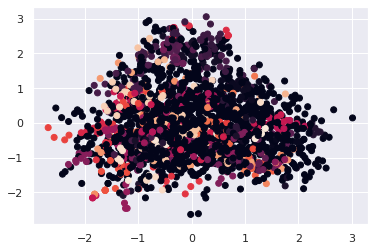

In [102]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#표준화(평균=0, 분산=1)
scale = StandardScaler()
scale.fit(X2D)
scaled_X = scale.transform(X2D)
scaled_x = scaled_X[:,0]
scaled_y = scaled_X[:,1]

#DBSCAN
#parameters
eps={'오피니언':1,'세계':0.65,'사회':1.1 ,'경제':1.15 ,'생활문화':0.75 ,'IT과학':1 }
min_samples={'오피니언':3,'세계':3,'사회':5,'경제':5 ,'생활문화':3 ,'IT과학' :3 }

dbscan = DBSCAN(eps=1, min_samples=3) #사회.

cluster = dbscan.fit_predict(X3D)
plt.scatter(x=scaled_x,y=scaled_y,c=cluster)

print(max(cluster)) #클러스터 개수
print(len(cluster)) #should be matched with news number

#클러스터링 하는 데에 사용----------------------------
group_cluster=[[] for i in range(len(cluster))] 
group_raw=[[]for i in range(len(cluster))] 
group_news_id=[[]for i in range(len(cluster))]
#-----------------------------------------------

gc=[] #벡터표현 들어감 (클러스터링 된 리스트)
gc_raw=[] #뉴스 제목 한글로 들어감 (클러스터링 된 리스트)
gc_id=[] #뉴스 아이디 (클러스터링 된 리스트)

np_ids=df_title['aid'].tolist()
#-----------------------------------------------
for i in range(len(corpus_raw)):
    group_cluster[cluster[i]].append(X3D[i])
    group_raw[cluster[i]].append(corpus_raw[i])
    print(i)
    group_news_id[cluster[i]].append(np_ids[i])

num=0 #클러스터링 된 뉴스 개수들. 사회 기사의 경우 약 1만개의 뉴스들 중에서 2343개만 살아남았다.
for i in range(len(cluster)):
    if i==len(cluster)-1 or group_cluster[i]==[]:#if i==0 or i==len(cluster)-1 or group_cluster[i]==[]:
        #if i==0 or i==len(cluster)-1:
        #    print(group_raw[i])
        continue
    
    gc.append(group_cluster[i])
    gc_raw.append(group_raw[i])
    gc_id.append(group_news_id[i])
    num+=len(group_raw[i])


print(gc_raw)
print(gc_id)
#까만 점은 클러스터링 안 된..버려지는 뉴스들
num #실제로 클러스터링된 뉴스 개수
print(num)
#사회
#eps,min : cluster,news
#0.8,5 : 512 3039
#0.7,5 : 457 2343
#1, 5  : 219 3697
#1, 7  : 131 2625
#1.1 5 : 153 5537

In [103]:
#DAHYUN

#만들어진 클러스터를 확인하는 셀입니다.
#DBSCAN으로 클러스터링
#각 클러스터별로 코사인유사도 구해서 0.95이상만 살림
#클러스터별 코사인 유사도는 cs_scores리스트에 저장됨. 클러스터 인덱스와 같은 인덱스를 사용한다.
#클러스터별로 묶인 벡터 리스트는 gc
#클러스터 별로 묶인 벡터의 원본 스트링(기사제목)은 gc_raw에 저장되어있어요.
#ISSUE: 같은 제목으로 묶인 뉴스들이 우루루루루루루루루루루...


cs_score=0
cs_scores=[0 for i in range(len(gc))]

final_cluster_raw=[]
final_cluster_news_id=[]
for i in range(len(gc)):
    cs_score=0
    num=0
    for j in range(len(gc[i])):
        for k in range(len(gc[i])):
            if j!=k:
                num+=1
                #print(j,' ',num)
                cs_score=cs_score+cos_sim(gc[i][j],gc[i][k])#/num
                #print(cs_score)
    #print()
    if len(gc[i])==1:
        cs_scores[i]=cs_score
    else:
        cs_scores[i] =cs_score/(len(gc[i])*(len(gc[i])-1))
    if cs_scores[i]<0.95:
    #if cs_scores[i]<0.90 or cs_scores[i]>0.95:
        continue
    print(cs_scores[i])
    for q in range(len(gc_raw[i])):
        print(gc_id[i][q],gc_raw[i][q])
    final_cluster_news_id.append(gc_id[i])
    final_cluster_raw.append(gc_raw[i])
        #print()
    
    print()



0.9686478078365326
10578 반도체용 불화수소 국산화 위한 품질평가 본격 착수
559095 표준연 반도체용 불화수소 품질평가 설비 완공
2200096 표준연 반도체용 불화수소 품질평가 개시…소재 국산화 지원
3801402 불화수소 국산화 빨라진다···표준연 반도체용 불화수소 품질평가 시작
4499030 반도체용 불화수소 국산화 박차

0.961569238844372
16836 애플워치6 오는 29일 국내 출시…23일부터 사전주문
31008 애플워치6·SE 29일 국내 출시...30만원대부터
43568 애플 애플워치6 내일23일부터 구매 가능…어디서 살까
596993 애플워치6·SE 오늘 한국 상륙 … 가격은 얼마부터
1364512 애플워치6·SE 29일 국내 출시…23일부터 온라인 예약
2092087 애플워치6·SE 국내 상륙…23일부터 주문 가능
2200070 애플워치6·애플워치SE 29일 국내 출시
2429817 애플워치6·SE 23일 국내 출시…35만9000부터
2904279 애플워치 6세대·SE 29일 국내 출시... 23일부터 사전예약
4759997 애플워치6·SE 23일 온라인 판매 시작…매장은 29일부터
4886616 애플워치6·애플워치SE 23일 국내 출시…오프라인 판매는 29일부터
4889276 애플워치6·애플워치SE 23일 온라인 주문 시작
4889277 애플워치6·애플워치SE 23일 온라인 주문 시작
4889278 애플워치6·애플워치SE 23일 온라인  출시...오프라인 판매 29일부터
4889279 애플워치6·애플워치SE 23일 온라인 주문..오프라인은 29일부터

0.9634717583656311
30999 배민 전통시장 맛집도 배달한다
4420708 전통시장 맛집도 배달됩니다 … 배민 전통시장 페이지 오픈
4474558 배달의민족 전통시장 맛집도 배달합니다
4498897 배달의민족 전통시장 맛집도 배달한다
4885303 전통시장 맛집 음식도 배달의민족에서 시켜 드세요

0.9536625444889069
31016 LGU

In [ ]:
final_cluster_raw=[]
final_cluster_news_id=[]
final_cluster_cs_score=[]
for i in range(len(gc)):
    if cs_scores[i]<0.95:
    #if cs_score<0.92 or cs_score>0.94:
        continue
    print(cs_scores[i])
    for q in range(len(gc_raw[i])):
        print(gc_id[i][q],gc_raw[i][q])
    final_cluster_news_id.append(gc_id[i]) #최종으로 살아남은 클러스터 별 뉴스 id
    final_cluster_raw.append(gc_raw[i]) #최종으로 살아남은 클러스터별 뉴스 제목
    final_cluster_cs_score.append(cs_scores[i]) #최종으로 살아남은 클러스터 별 코사인 유사도
    print()

In [ ]:
#딕셔너리 만들기! 
#형식!은 다음과 같아요.
#{'1':{'id':[1001,1002,2043,...],'cs_score':0.97},
# '2':{'id':[3001,3002,...],'cs_score':0.94}...}
cluster_dic={}

for i in range(len(final_cluster_cs_score)):
     cluster_dic[i]={}
     cluster_dic[i]['id']=final_cluster_news_id[i]
     cluster_dic[i]['cs_score']=final_cluster_cs_score[i]
     cluster_dic[i]['size']=len(final_cluster_news_id[i])

In [ ]:
#클러스터 딕셔너리를 뉴스기사 개수 순으로 정렬해요
cluster_dic=sorted(cluster_dic.items(),key=(lambda x: x[1]['size']),reverse=True)

In [ ]:
#클러스터 키 값을 다시 만들기 위해 section_dic를 만듭니다.
#뉴스 섹션 별 클러스터들을 갖고 있는 딕셔너리에요.
#이제 클러스더 순서 별로 크기정렬이 되었어요.
section_dic={}
for i in range(len(final_cluster_news_id)):
    section_dic[i]={}
    section_dic[i]['id']=cluster_dic[i][1]['id']
    section_dic[i]['cs_score']=cluster_dic[i][1]['cs_score']
    section_dic[i]['size']=cluster_dic[i][1]['size']
section_dic

이제 섹션별로 클러스터 딕셔너리를 모아볼까요..?ㅎㅎ...

In [ ]:
#중복 뉴스 확인

for i, title in enumerate(df_merge['title']):
    if title  == '여의도서 열린 민주노총 전국노동자대회':
        print(title)
        print(df_merge['content'][i])
        print(df_merge['company'][i])
        print()
        

